In [1]:
"""
    This python file is for manual debbuging. We want to ensure that 
    each block of our Python.py do the right work.
"""

'\n    This python file is for manual debbuging. We want to ensure that \n    each block of our Python.py do the right work.\n'

In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
import os
import subprocess

In [8]:
""" 
    The first thing to do here is to read our problem.ini.
"""

def Problem_parameters(filename):
    #We define a dictionnary to hold the parameter
    parameters= {}
    #We start opening the file
    with open(filename) as file:
        #We read each line 
        for line in file:
            if "=" in line:
                key , value = line.strip().split("=")
                parameters[key.strip()] = np.float64(value.strip())

    return parameters["x_min"], parameters["x_max"] , parameters["delta_t"], parameters["diffusion_coefficient"]    

x_min , x_max , delta_t , diffusion_coefficient = Problem_parameters("./Setup/problem.ini")
print("x_min =",x_min, ";", "x_max=",x_max, ";", "delta_t=", delta_t, ";", "diffusion_coefficient=",diffusion_coefficient,".")

x_min = 0.0 ; x_max= 1.0 ; delta_t= 0.00454545 ; diffusion_coefficient= 1.0 .


In [9]:
""" 
    Now that we have the parameters we can set up the grid and
    generate initial conditons.
"""
N=100 #Number of points x_{i}
x= np.linspace(x_min , x_max , N)
#Initial condition U_0 = U(0,.)
U_0= np.sin(np.pi*x)

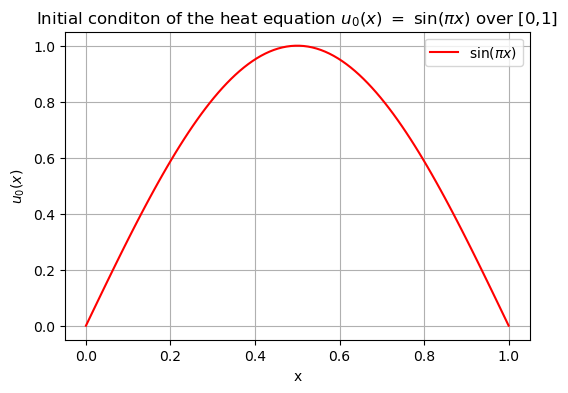

In [10]:
plt.figure(figsize=(6,4))
plt.plot(x, U_0, label=r'$\sin(\pi x)$', color='r')
plt.xlabel('x')
plt.ylabel('$u_{0}(x)$')
plt.title('Initial conditon of the heat equation $u_{0}(x)$ $=$ $\\sin(\\pi x)$ over [0,1]')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
""" 
    Now that the initial conditon is setup we can run the heat_solver.exe.
    Sort output.dat files and then build the heat matrix
"""
Output_dat = subprocess.run("./Bin/heat_solver.exe")

#We check whether Output_return code is 0
if(Output_dat.returncode !=0):
    print("Execution fialed.")
    exit(1)



In [18]:
""" 
    We need to sort the ./Output/folder according to time step then build the heat matrix
"""

folder= "./Output/"

output_list = sorted([ f for f in os.listdir(folder)
                      if f.startswith("output_") and f.endswith(".dat")],
                      key = lambda name: int(name.split("_")[1].split(".")[0]))

#Output_file is a sorted list of output.dat according to the timestep index.
#We now make a list of output.dat filee

Heat= []

for out in output_list:
    #We join the file folder name and the file name to get the full path
    path = os.path.join(folder, out)
    #we read single element of the list back to double
    U = np.fromfile(path , dtype = np.float64)
    Heat.append(U)

Heat = np.array(Heat)
print(Heat.shape)

(110, 100)


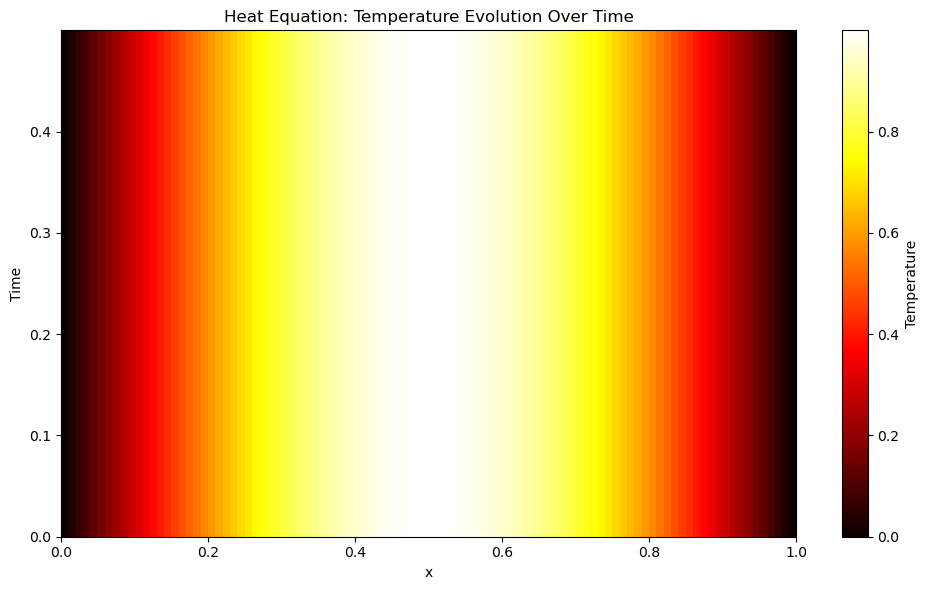

In [19]:
""" 
We can now plot the 2D heatmap with x axis corresponding to the grid,
y to the time and z to the temperature.
"""
Timestep = Heat.shape[0]
y = np.linspace(0, delta_t*Timestep, Timestep )

plt.figure(figsize=(10, 6))
plt.imshow(Heat, aspect='auto', origin='lower', extent=[x_min, x_max, 0, y[-1]], cmap='hot')
plt.colorbar(label='Temperature')
plt.xlabel("x")
plt.ylabel("Time")
plt.title("Heat Equation: Temperature Evolution Over Time")
plt.tight_layout()
plt.show()